In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [57]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv');
df

,level_0,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,240,242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,241,243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,242,244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [58]:
df.drop(columns=['day','level_0','index','month','year'],inplace=True)

In [59]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [60]:
df["Classes"]=df["Classes"].str.strip()

In [61]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [62]:
df['Classes']=df['Classes'].map({"not fire":0 ,"fire":1})

In [63]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [64]:
X=df.drop(columns=['FWI']);
Y=df['FWI']

In [65]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [66]:
## Train and test split
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
p

In [67]:
X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


<Axes: >

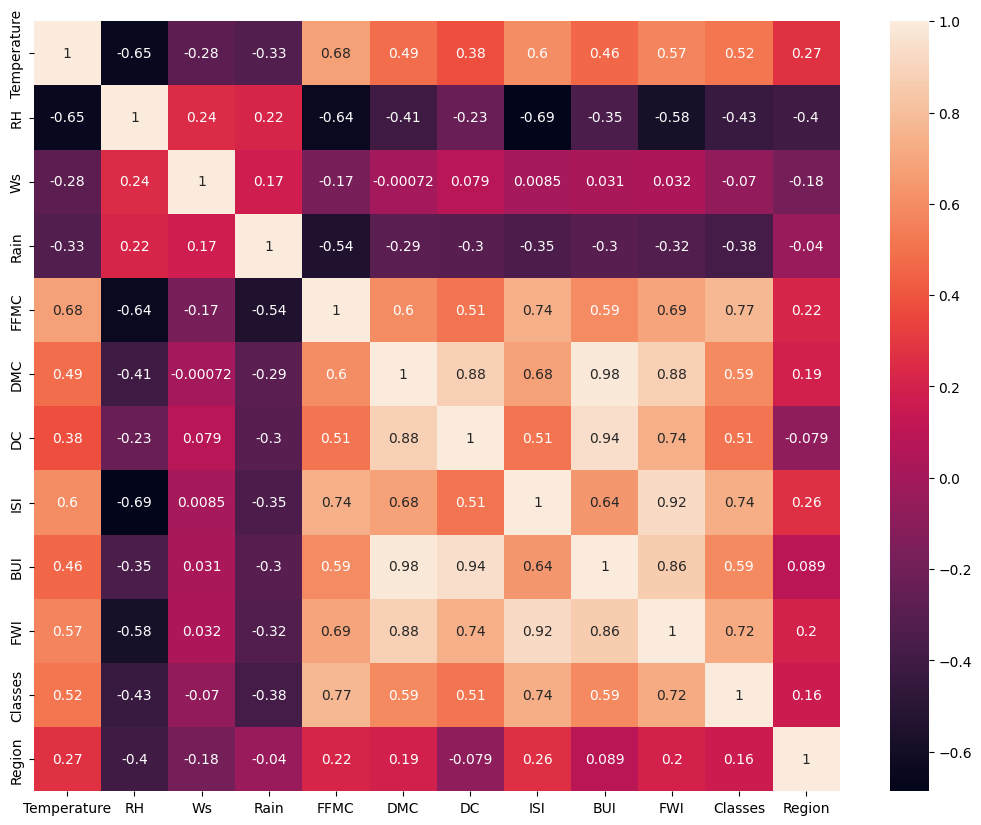

In [68]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

## getting feature as per threshold
### Threshold is set by domain expert

In [69]:
def get(dataset,threshold):
    '''made by me'''
    ans=set();
    cor_matrix=dataset.corr();  
    for i in range(len(cor_matrix)):
        for j in range(i):
            if(abs(cor_matrix.iloc[i,j]>threshold)):
                ans.add(cor_matrix.columns[i])
    return ans

In [70]:
drop_feature=(get(X_train,0.85))

In [71]:
## droping these values

In [72]:
X_train.drop(drop_feature,axis=1,inplace=True)
X_test.drop(drop_feature,axis=1,inplace=True)

## Feature Scaling and Standarization

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

### Note we only transform our test data

In [104]:

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Comparing throught box plots

Text(0.5, 1.0, 'X_train After Scaling')

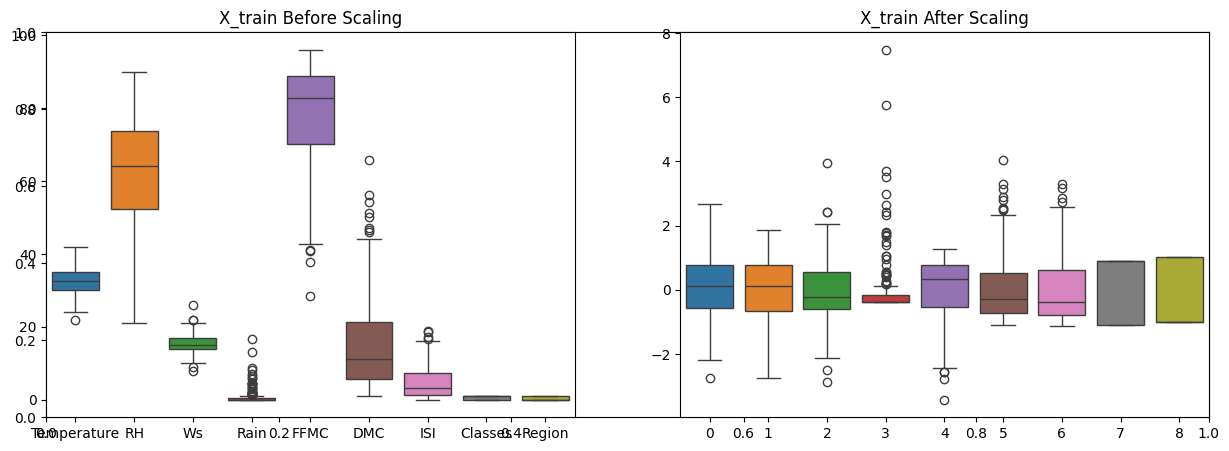

In [105]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [107]:
regression.fit(X_train_scaled,Y_train);

In [108]:
regression.coef_,regression.intercept_

(array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
         3.6982583 ,  4.84057298,  0.40422124, -0.39259928]),
 np.float64(7.156043956043957))

In [109]:
from sklearn.metrics import mean_absolute_error

In [110]:
y_pred_test=regression.predict(X_test_scaled);

In [111]:
print(X_train_scaled.shape,Y_train.shape,X_test_scaled.shape,Y_test.shape)

(182, 9) (182,) (61, 9) (61,)


In [112]:
mae=mean_absolute_error(y_pred_test,Y_test)
mae

0.546823646525

In [86]:
from sklearn.metrics import r2_score

In [114]:
r2_s=r2_score(y_pred_test,Y_test)

In [115]:
r2_s

0.9839977157632893

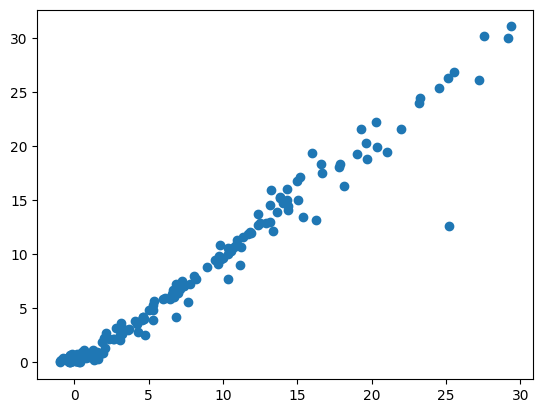

In [116]:
plt.scatter(y_pred_train,Y_train)

### Lasso Regression

Mean absolute error 1.133175994914409
R2 Score 0.9492020263112388


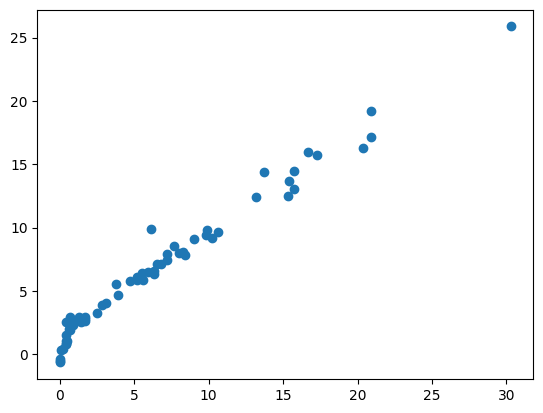

In [118]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(Y_test,y_pred)

### Rigde Regression

Mean absolute error 0.5642305340105713
R2 Score 0.9842993364555512


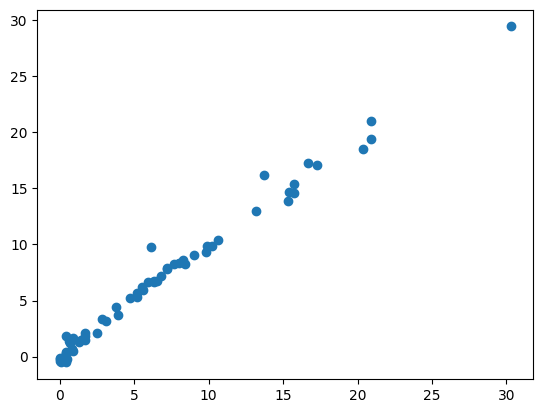

In [119]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(Y_test,y_pred)

### Elasticnet Regression

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


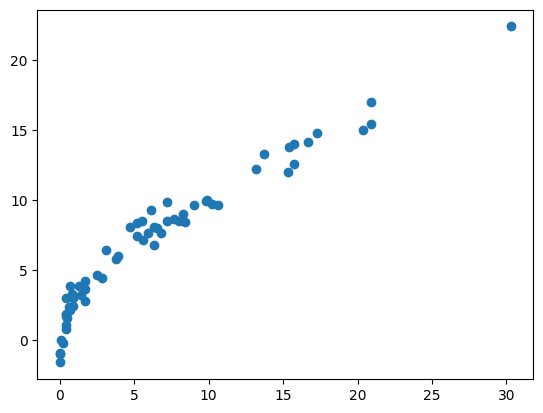

In [122]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,Y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(Y_test,y_pred)